# Plots with Self-Defined Colormaps

This tutorial shows how to use the module `tropy.plotting_tools.colormaps` to make plots with the colormaps provided by this module.

## Import Libraries

In [1]:
%matplotlib inline

# standard libs
import numpy as np
import scipy.ndimage

# plotting and mapping
import pylab as plt
import seaborn as sns
sns.set_context('talk')
plt.rcParams['figure.figsize'] = (8, 6)

# the own tropy lib
import tropy.plotting_tools.colormaps
import tropy.plotting_tools.shaded


## Making Example Data 

We make some random example data for plotting.

In [2]:
nrow, ncol = 180, 200
x = np.linspace(0, 1, ncol)
y = np.linspace(0, 1, nrow)

r = 4 * np.random.randn( nrow, ncol )

# smoothing
r_sm = scipy.ndimage.gaussian_filter(r, 2 )



## Colormap  based on Colorname

We take the random data and test different colormap options.

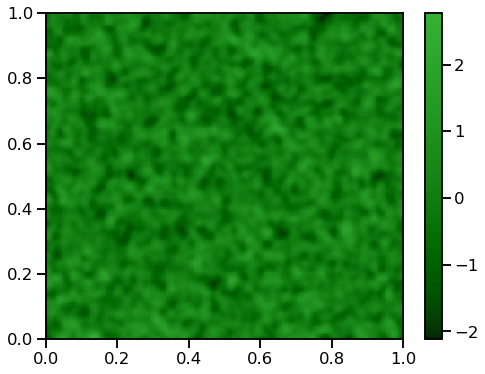

In [3]:
cmap = tropy.plotting_tools.colormaps.colorname_based_cmap( 'darkgreen')
plt.pcolormesh(x, y, r_sm, cmap = cmap)
plt.colorbar()

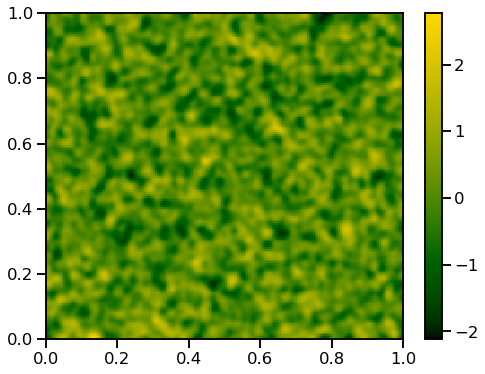

In [4]:
cmap = tropy.plotting_tools.colormaps.colorname_based_cmap( 'darkgreen', 
                                                            start_col = 'black', 
                                                            final_col = 'gold')
plt.pcolormesh(x, y, r_sm, cmap = cmap)
plt.colorbar()

Hmm, don't know if you need this ... let's look at the next functions.

## "Nice" Colormaps

We loop over the different colormap choices.

In [5]:
help( tropy.plotting_tools.colormaps.nice_cmaps )

Help on function nice_cmaps in module tropy.plotting_tools.colormaps:

nice_cmaps(cmap_name)
    Some pre-defined "nice" colormaps.
    
    
    Parameters
    ----------
    cmap_name : str
        name of a pre-defined colormap.
    
        * 'red2blue_disc'           :  a discrete red to blue 
          transistion
        * 'red2blue'                :  a contineous red to blue 
          transistion 
        * 'white-green-orange'      :  a green-based transition 
          from white to orange 
        * 'white-blue-green-orange' :  a blue-based transition 
          from white to orange 
        * 'white-purple-orange'     :  a purple-based transistion 
          from white to orange
        * 'ocean-clouds'            :  for clouds over ocean
        * 'land-clouds'             :  for clouds over land
    
    
    Returns
    -------
    cmap : matplotlib colormap object
        resulting colormap



In [6]:
colormap_names = [ 'red2blue_disc',           #   a discrete red to blue transistion
                   'red2blue' ,               #   a continuous red to blue transistion
                   'white-green-orange',      #   a green-based transition from white to orange 
                   'white-blue-green-orange', #   a blue-based transition from white to orange 
                   'white-purple-orange',     #   a purple-based transistion from white to orange
                   'ocean-clouds',            #   for clouds over ocean
                   'land-clouds'              #   for clouds over land
                 ]

### Another Rainbow

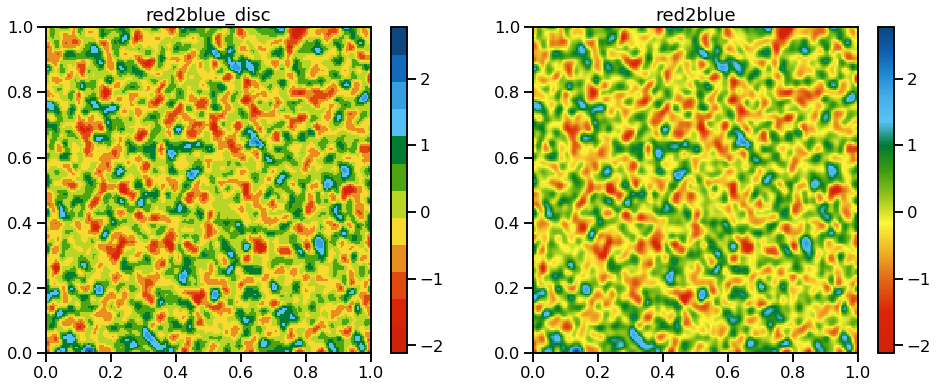

In [7]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (16,6))
axs = axs.flatten()

for i, colmap in enumerate( colormap_names[0:2] ):

    cmap = tropy.plotting_tools.colormaps.nice_cmaps( colmap )
    
    plt.sca( axs[i] )
    plt.title( colmap )
    plt.pcolormesh(x, y, r_sm, cmap = cmap)
    plt.colorbar()

### Starting from "nowhere"

The colormaps start with white and are useful for positive-definite fields, like PDFs. 

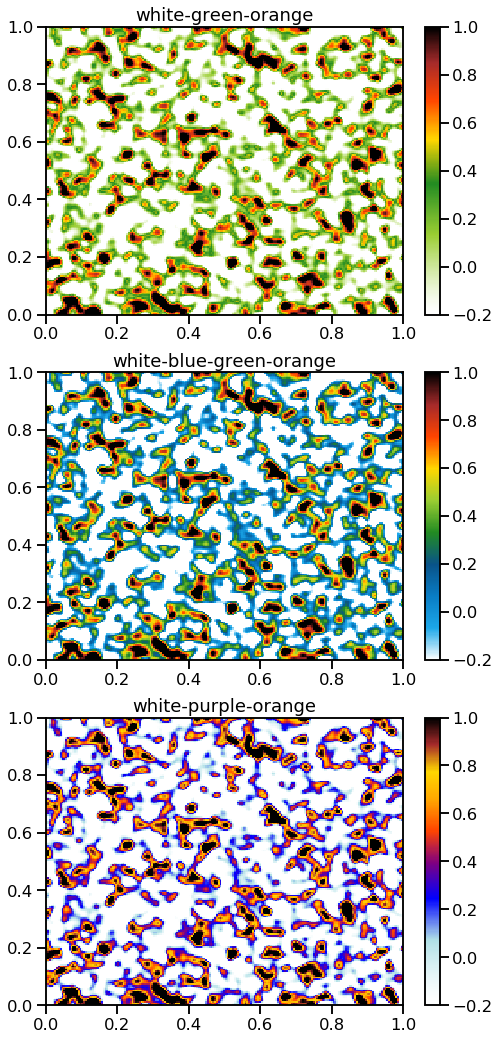

In [8]:
fig, axs = plt.subplots(nrows = 3, ncols = 1, figsize = (8,18))
axs = axs.flatten()
plt.subplots_adjust( wspace = 0.4 )

for i, colmap in enumerate( colormap_names[2: 5] ):

    cmap = tropy.plotting_tools.colormaps.nice_cmaps( colmap )
    
    plt.sca( axs[i] )
    plt.title( colmap )
    plt.pcolormesh(x, y, r_sm, cmap = cmap, vmin = -0.2, vmax = 1.)
    plt.colorbar()

### Clouds 

The colormaps are for clouds over different undergrounds - to mimick the visible satellite composites.

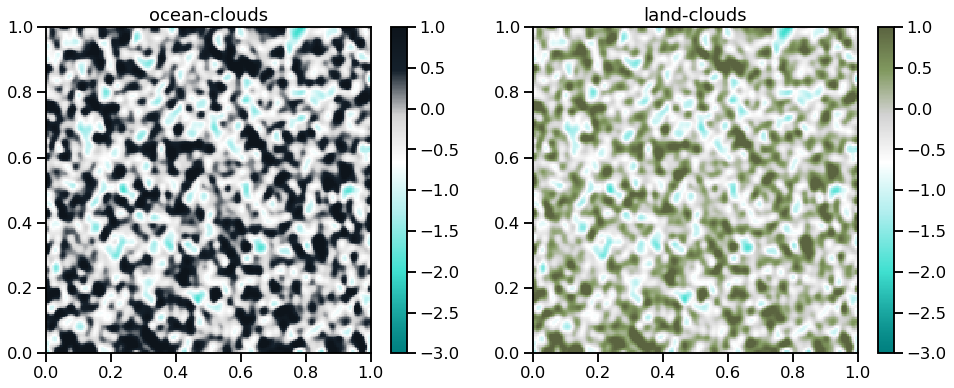

In [9]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (16,6))
axs = axs.flatten()

for i, colmap in enumerate( colormap_names[-2:] ):

    cmap = tropy.plotting_tools.colormaps.nice_cmaps( colmap )
    
    plt.sca( axs[i] )
    plt.title( colmap )
    plt.pcolormesh(x, y, r_sm, cmap = cmap, vmin = -3., vmax = 1.)
    plt.colorbar()

## Colormaps for Satellite Data

The function `enhanced_colormap` is for 10.8 um brightness temperatures from satellite (e.g. for Meteosat SEVIRI).

We scale our random data in the typical range (200 K, 300 K)

In [10]:
help( tropy.plotting_tools.colormaps.enhanced_colormap)

Help on function enhanced_colormap in module tropy.plotting_tools.colormaps:

enhanced_colormap(vmin=200.0, vmed=240.0, vmax=300.0)
    Standard color enhancement used for infrared satellite brightness 
    temperatures (BTs) in the atmospheric window around 10.8 um.  
    
    
    Parameters
    ----------
    vmin : float, optional
        minimum BT 
    
    vmed : float, optional
        BT where transition between gray-scale and rainbow 
        colors is done
    
    vmax : float, optional
        maximum BT 
    
    
    Returns
    -------
    mymap : matplotlib colormap object
        resulting colormap



In [11]:
b = scipy.ndimage.gaussian_filter( r_sm, 5)
bn =  (b - b.min()) / (b.max() - b.min()) 

In [12]:
bt108 = 100 * bn + 200

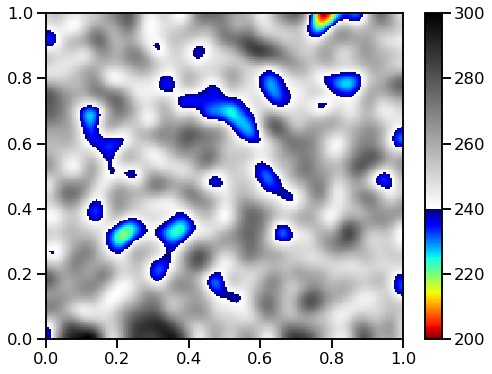

In [13]:
cmap = tropy.plotting_tools.colormaps.enhanced_colormap( )
plt.pcolormesh(x, y, bt108, cmap = cmap, vmin = 200, vmax = 300)
plt.colorbar()

The function `enhanced_wv62_cmap` is for the brightness temperature in the water vapor channel (e.g. for Meteosat SEVIRI).

We scale our random data in the typical range (200 K, 260 K)

In [14]:
help(tropy.plotting_tools.colormaps.enhanced_wv62_cmap)

Help on function enhanced_wv62_cmap in module tropy.plotting_tools.colormaps:

enhanced_wv62_cmap(vmin=200.0, vmed1=230.0, vmed2=240.0, vmax=260.0)
    Color enhancement (non-standard - more artistic) used for infrared satellite 
    brightness temperatures (BTs) for water vapor channels.
    
    
    Parameters
    ----------
    vmin : float, optional
        minimum BT 
    
    vmed1 : float, optional
        BT where first transition between brownish colors
        and gray-scale is done
    
    vmed2 : float, optional
        BT where second transition between gray-scale 
        and rainbow colors is done
    
    vmax : float, optional
        maximum BT 
    
    
    Returns
    -------
    mymap : matplotlib colormap object
        resulting colormap



In [15]:
bt062 = 70 * bn + 200

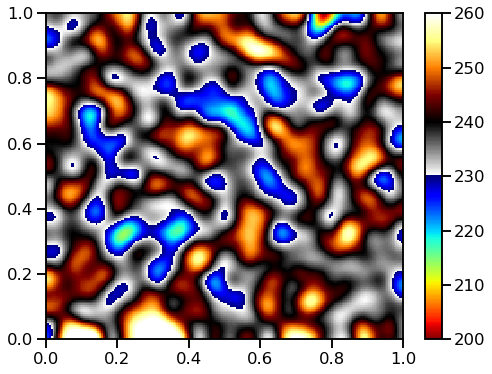

In [16]:
cmap = tropy.plotting_tools.colormaps.enhanced_wv62_cmap( )
plt.pcolormesh(x, y, bt062, cmap = cmap, vmin = 200, vmax = 260)
plt.colorbar()

## Colormap for Radar Data

This colormap is taken from the DWD website to plot rain accumulations.

In [17]:
help( tropy.plotting_tools.colormaps.dwd_sfmap )

Help on function dwd_sfmap in module tropy.plotting_tools.colormaps:

dwd_sfmap()
    Colormap for DWD Radolan SF product for observed daily rain 
    accumulations.
    
    
    Returns
    -------
    rrlevs : list
        rain rate levels (in mm)
    
    cmap :  matplotlib colormap object
        SF colormap



In [18]:
rr = 600 * b**3
rr = np.ma.masked_less(rr, 0.1)

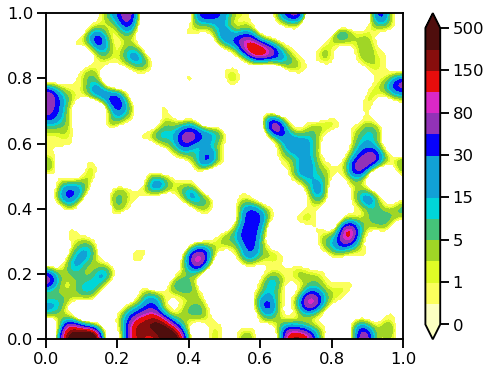

In [19]:
rrlevs, cmap = tropy.plotting_tools.colormaps.dwd_sfmap( )
tropy.plotting_tools.shaded.shaded(x, y, rr, cmap = cmap, levels = rrlevs)
plt.colorbar()

## Summary

The module `tropy.plotting_tools.colormaps`  provides you some self-defined colormaps, esp. 

* for satellite data
* positive-definite fields (like pdfs) which start from zero (white)